In [1]:
%load_ext autoreload
%autoreload 2
import sys
from pathlib import Path
project_root = Path.cwd().parent.parent  # Assuming notebook is in experiments/notebooks/
sys.path.insert(0, str(project_root))
print(sys.path)
import pandas as pd
import matplotlib.pyplot as plt
from experiments.analysis_utils.data_processing import read_directory
from experiments.analysis_utils.visualization import plot_reaction_speed_distribution, plot_token_distribution

['/home/rotsker/PycharmProjects/dg-research-revision', '/home/rotsker/miniconda3/envs/radCAD/lib/python312.zip', '/home/rotsker/miniconda3/envs/radCAD/lib/python3.12', '/home/rotsker/miniconda3/envs/radCAD/lib/python3.12/lib-dynload', '', '/home/rotsker/miniconda3/envs/radCAD/lib/python3.12/site-packages']


In [14]:
# Read the data
path_to_runs = Path("../../results/simulations/model_validation/")
print(path_to_runs.resolve())
print(path_to_runs.resolve().exists())
proposal_df_full, start_data_df_full, timestep_data_df_full = read_directory(path_to_runs.resolve())

# Optional: save the plot
# plt.savefig('reaction_speed_distribution.png', bbox_inches='tight')

/home/rotsker/PycharmProjects/dg-research-revision/results/simulations/model_validation
True


<Axes: ylabel='actors_total_actors_quit'>

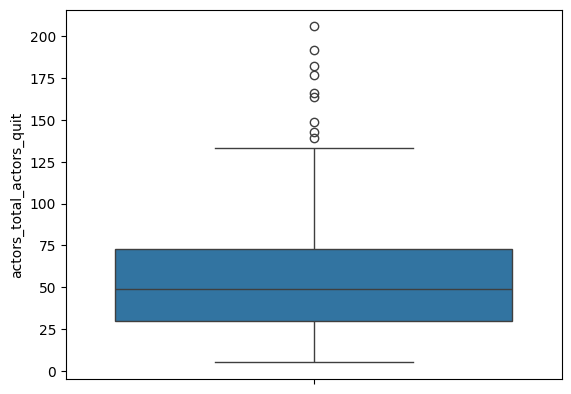

In [15]:
import seaborn as sns

timestep_data_df_full_720 = timestep_data_df_full[timestep_data_df_full.timestep == 720]
timestep_data_df_full_720_quit = timestep_data_df_full_720[timestep_data_df_full_720.actors_total_actors_quit > 0]
sns.boxplot(timestep_data_df_full_720_quit, y="actors_total_actors_quit")

Text(0.5, 1.0, 'Distribution of token amount that exited the protocol')

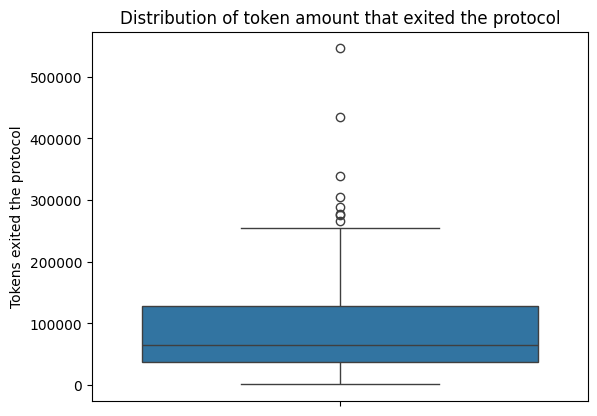

In [72]:
ax = sns.boxplot(timestep_data_df_full_720_quit, y="actors_total_quit")
ax.set_ylabel("Tokens exited the protocol")
ax.set_title('Distribution of token amount that exited the protocol')

In [74]:
timestep_data_df_full_720_quit.actors_total_quit.median()

np.float64(65495.59829654)

In [19]:
number_of_runs_with_quit = timestep_data_df_full_720_quit.shape[0]
number_of_runs_without_quit = timestep_data_df_full_720.shape[0] - number_of_runs_with_quit
print(f"Number of runs with quit: {number_of_runs_with_quit}")
print(f"Number of runs without quit: {number_of_runs_without_quit}")

Number of runs with quit: 137
Number of runs without quit: 113


In [24]:
timestep_data_df_full_720

,timestep,simulation_hash,dg_state_value,dg_state_name,dg_rage_quit_support,dg_dynamic_timelock_seconds,actors_total_balance,actors_total_locked,actors_total_number,actors_total_number_locked,...,healing_CoordinatedDefender,recovery_CoordinatedDefender,actors_locked_CoordinatedDefender,actors_affected_CoordinatedDefender,actors_quit_CoordinatedDefender,quit_CoordinatedDefender,actors_total_balance_relative,actors_total_locked_relative,actors_total_health_relative,run_id
719,720,780da27d5e02c30145dc2997d4e069a367f73200103daa...,1,Normal,0,0,8.996417e+06,0.000000,1986,0,...,0,0,0,0,0,0.0,1.000000,0.000000,2.255277,0
1439,720,685cd2142f74ea6e1e70c8e21a3f8843b9aecf148bed99...,1,Normal,0,0,8.996417e+06,0.000000,1986,0,...,0,0,0,0,0,0.0,1.000000,0.000000,1.166228,1
2159,720,f43f870a4fd3123b8df24fbcdc004f9ea789a333d9f9f6...,1,Normal,0,0,8.996417e+06,0.000000,1986,0,...,0,0,0,0,0,0.0,1.000000,0.000000,1.737900,2
2879,720,5588718b94b2004f2a79e2175e53b6a942526fa611bffd...,1,Normal,0,0,8.996417e+06,0.000000,1986,0,...,0,0,0,0,0,0.0,1.000000,0.000000,1.600140,3
3599,720,93c948c713fd5379fc699d12d54da05ca450a8872ab46b...,1,Normal,0,0,8.996417e+06,0.000000,1986,0,...,0,0,0,0,0,0.0,1.000000,0.000000,0.906950,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33119,720,5bdb6e2bf566ef3482bd2cb517ad7bd02d1c9cb1667619...,1,Normal,0,0,8.996417e+06,0.000000,1986,0,...,0,0,0,0,0,0.0,1.000000,0.000000,1.983119,245
33839,720,6779cbffe3debf7d03f33144cc9839003d8c91bd531514...,1,Normal,0,0,8.996417e+06,0.000000,1986,0,...,0,0,0,0,0,0.0,1.000000,0.000000,0.833602,246
34559,720,59177701fae69cc180acecd2cc9e57351003e9b664d4d4...,1,Normal,0,0,8.996417e+06,0.000000,1986,0,...,0,0,0,0,0,0.0,1.000000,0.000000,0.647805,247
35279,720,9fef6cb6f319ee148ee365e903c1c7a3c52d111752651d...,1,Normal,0,0,8.996417e+06,0.000000,1986,0,...,0,0,0,0,0,0.0,1.000000,0.000000,1.236931,248


In [25]:
# Group by run_id and dg_state_name and count occurrences
state_counts = timestep_data_df_full.groupby(['run_id', 'dg_state_name']).size().unstack(fill_value=0)

# Calculate summary statistics
print("Average number of timesteps in each state per run:")
print(state_counts.mean().round(2))
print("\nMedian number of timesteps in each state per run:")
print(state_counts.median().round(2))

Average number of timesteps in each state per run:
dg_state_name
Normal                        684.94
VetoCooldown                    0.94
VetoSignalling                 22.66
VetoSignallingDeactivation     11.46
dtype: float64

Median number of timesteps in each state per run:
dg_state_name
Normal                        720.0
VetoCooldown                    0.0
VetoSignalling                  0.0
VetoSignallingDeactivation      0.0
dtype: float64


In [61]:
(state_counts / 720).mean()

dg_state_name
Normal                        0.951306
VetoCooldown                  0.001300
VetoSignalling                0.031472
VetoSignallingDeactivation    0.015922
dtype: float64

In [62]:
720 * 3

2160

In [51]:
(state_counts * 3).mean() / stat

dg_state_name
Normal                        2054.820
VetoCooldown                     2.808
VetoSignalling                  67.980
VetoSignallingDeactivation      34.392
dtype: float64

In [55]:
timestep_data_df_full_720.actors_total_actors_affected <= timestep_data_df_full_720.actors_total_actors_quit

719       True
1439      True
2159      True
2879      True
3599      True
         ...  
33119     True
33839     True
34559     True
35279     True
35999    False
Length: 250, dtype: bool

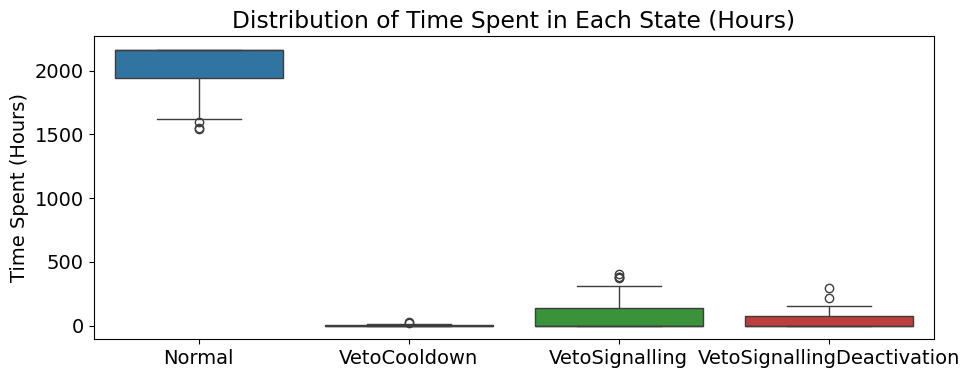

In [43]:
from experiments.analysis_utils.visualization import plot_state_distribution
plot_state_distribution(timestep_data_df_full, in_timesteps=False)

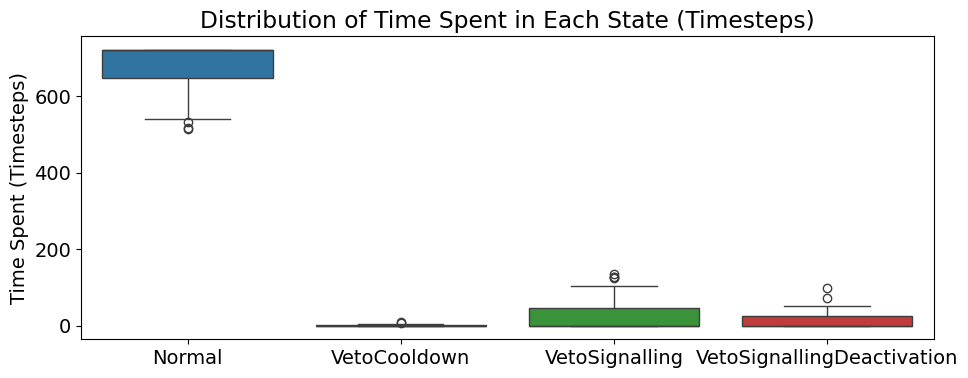

In [44]:
from experiments.analysis_utils.visualization import plot_state_distribution
plot_state_distribution(timestep_data_df_full, in_timesteps=True)

/home/rotsker/PycharmProjects/dg-research-revision/experiments/analysis_utils/visualization.py:285: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt.show()


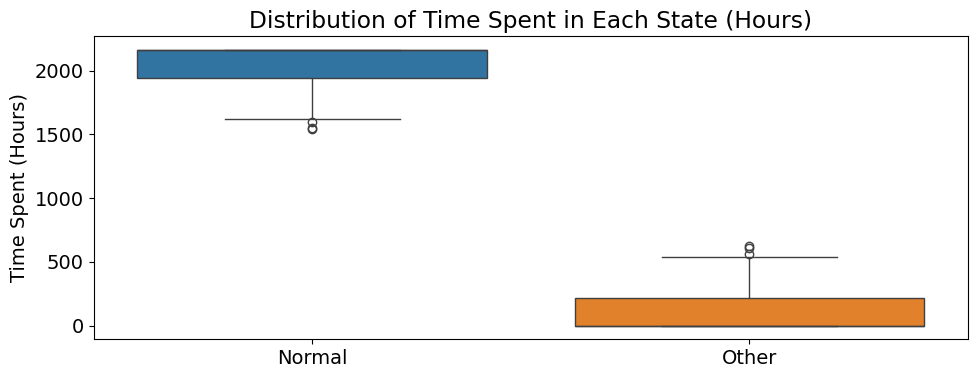

In [45]:
from experiments.analysis_utils.visualization import plot_state_distribution
plot_state_distribution(timestep_data_df_full, in_timesteps=False, collapse_non_normal=True)